Clothing_Categorization

Parker Williamson
1/22/2018

This program takes a set of training data and classification data and using different methods of computer vision categorizes the test set based on the training set. The data that was used to analyze different techniques was clothing data from https://www.kaggle.com/zalando-research/fashionmnist.

(used https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=1493&v=mynJtLhhcXk as a template for CNN)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import tensorflow as tf
import os
import sys
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [4]:
%matplotlib inline

Dictionary definitions shows the true categories that the dataset lists

In [5]:
definitions = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

open data from the adjacent rawData folder

In [6]:
#reset directory using next line
#os.chdir('C:/Users/Parker/Documents/2018/SpringBoard/clothingCategorization/DataWrangling')

abspath = os.path.abspath(os.curdir)
print(abspath)
os.chdir("..")
path = os.path.abspath(os.curdir)
print(path)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\Inferential Statistics
C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization


In [7]:
train_data = genfromtxt('rawData/fashion-mnist_train.csv', skip_header=True, delimiter=',')

In [8]:
test_data = genfromtxt('rawData/fashion-mnist_test.csv', skip_header=True, delimiter=',')

In [9]:
os.chdir(abspath)
print(abspath)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\Inferential Statistics


In [10]:
#plt.imshow(train_data[6][1:785].reshape((28,28)))
#plt.show()

In [11]:
classification,rawData =np.split(train_data,indices_or_sections=[1],axis=1)

In [12]:
#plt.hist(rawData[0][:],range=(0,255),bins=25)
#plt.show()

In [13]:
#compare mean median mode by image
images_mean = np.mean(rawData, axis=1, keepdims=1, dtype=int)
unique, images_counts = np.unique(classification.astype(int).ravel(), return_counts=True)
totals_mean = np.bincount(classification.astype(int).ravel(), images_mean.ravel())
#print(totals_mean)
#print(images_counts)
mean_by_type = totals_mean/images_counts
print('mean by type: {}'.format(mean_by_type))

#print(classification.ravel())
#print(np.median(rawData, axis=1, keepdims=1).ravel())
compressed = np.column_stack((classification.ravel(), np.median(rawData, axis=1, keepdims=1).ravel()))
#print(compressed)
images_median = pd.DataFrame(compressed,columns=['class','median of medians'])
sorted = images_median.groupby(['class'])
print(sorted.median())
images_mean_median = pd.DataFrame(compressed,columns=['class','mean of medians'])
sorted_mean_med = images_mean_median.groupby(['class'])
#print(sorted_mean_med.mean())
                       

mean by type: [ 82.37583333  56.24816667  95.22066667  65.70016667  97.65566667
  34.37516667  84.61316667  42.33666667  89.54033333  76.51516667]
       median of medians
class                   
0.0                 74.5
1.0                  0.0
2.0                118.5
3.0                  0.0
4.0                120.5
5.0                  0.0
6.0                 89.5
7.0                  0.0
8.0                 64.5
9.0                  0.0


Type:  T-shirt/top


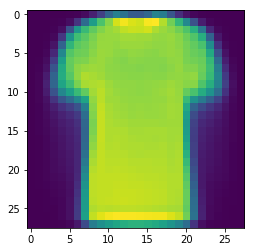

Type:  Trouser


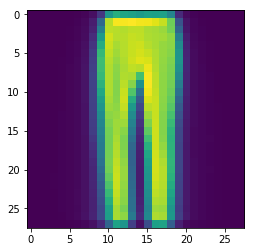

Type:  Pullover


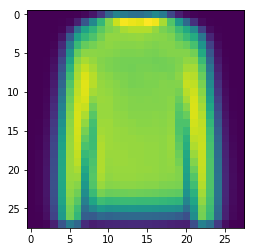

Type:  Dress


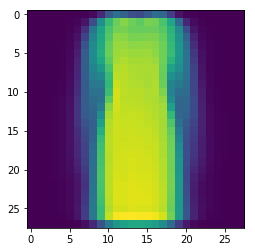

Type:  Coat


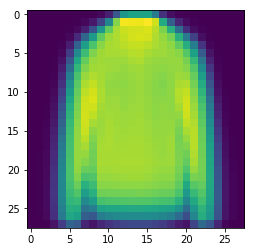

Type:  Sandal


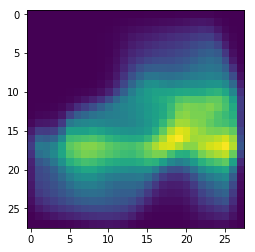

Type:  Shirt


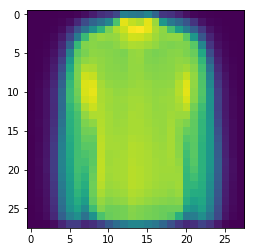

Type:  Sneaker


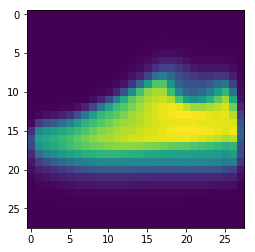

Type:  Bag


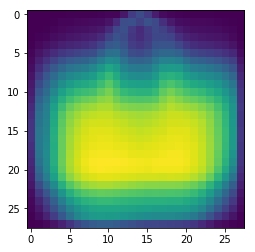

Type:  Ankle boot


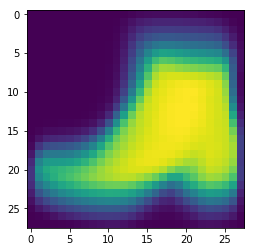

In [14]:
netImage = np.zeros((10,784))
for category in range(10):
    netImage[category,:] = np.sum(rawData[classification.ravel()==category],axis=0).ravel()
    print('Type: ',definitions[category])
    plt.imshow(netImage[category][0:784].reshape((28,28)))
    plt.show()

In [15]:
places, count =  np.unique(rawData[classification.ravel()==0], return_counts=True)
#print(places)
#print(count)
#temp, unique =  np.unique(rawData[0], return_counts=True)
#print(temp)
#print(unique)

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163.  1

(256,)
Type:  T-shirt/top


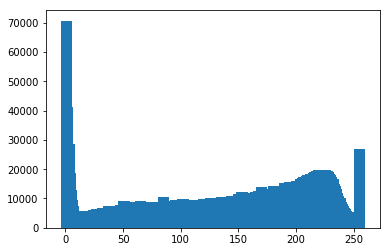

(256,)
Type:  Trouser


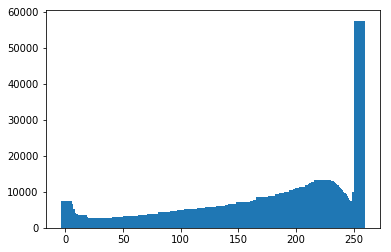

(256,)
Type:  Pullover


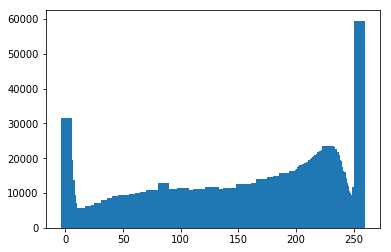

(256,)
Type:  Dress


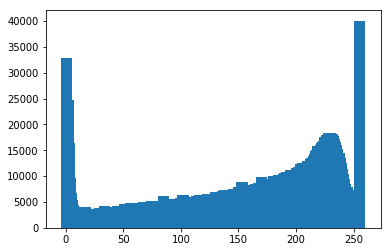

(256,)
Type:  Coat


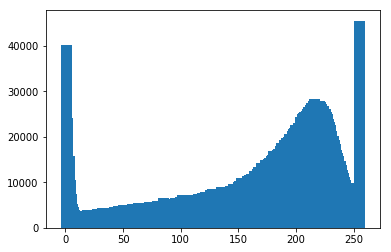

(256,)
Type:  Sandal


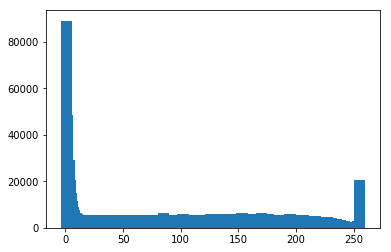

(256,)
Type:  Shirt


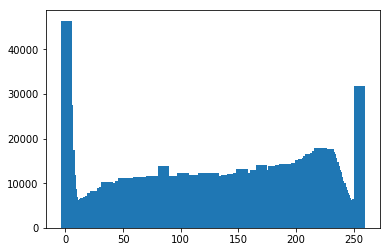

(256,)
Type:  Sneaker


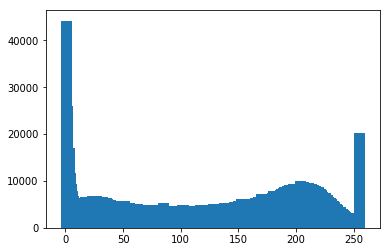

(256,)
Type:  Bag


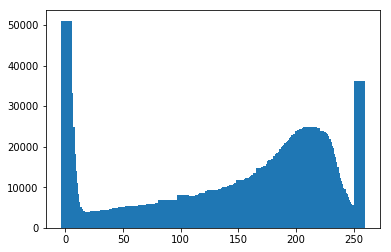

(256,)
Type:  Ankle boot


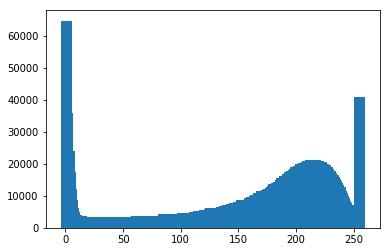

In [16]:
netHist = np.zeros((10,256))
for category in range(10):
    places, count =  np.unique(rawData[classification.ravel()==category], return_counts=True)
    #print(count)
    netHist[category,:] = count
    print(np.shape(netHist[category][:].ravel()))
    print('Type: ',definitions[category])
    plt.bar(range(1,256),netHist[category][1:256].ravel(),align='center',width=10)
    plt.show()

In [17]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [18]:
sd = np.zeros(10)

sd[0] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==0] - mean_by_type[0])**2))
sd[1] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==1] - mean_by_type[1])**2))
sd[2] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==2] - mean_by_type[2])**2))
sd[3] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==3] - mean_by_type[3])**2))
sd[4] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==4] - mean_by_type[4])**2))
sd[5] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==5] - mean_by_type[5])**2))
sd[6] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==6] - mean_by_type[6])**2))
sd[7] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==7] - mean_by_type[7])**2))
sd[8] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==8] - mean_by_type[8])**2))
sd[9] = np.sqrt(np.mean(abs(images_mean[classification.ravel()==9] - mean_by_type[9])**2))

In [19]:
n = np.zeros(10)

n[0] = len(images_mean[classification.ravel()==0])
n[1] = len(images_mean[classification.ravel()==1])
n[2] = len(images_mean[classification.ravel()==2])
n[3] = len(images_mean[classification.ravel()==3])
n[4] = len(images_mean[classification.ravel()==4])
n[5] = len(images_mean[classification.ravel()==5])
n[6] = len(images_mean[classification.ravel()==6])
n[7] = len(images_mean[classification.ravel()==7])
n[8] = len(images_mean[classification.ravel()==8])
n[9] = len(images_mean[classification.ravel()==9])

mudiff = 0

In [20]:
#order mean_by_type then find if mean is the same to neighbors
meanOrder = np.argsort(mean_by_type)

In [21]:
statistic,pvalue01 = twoSampZ(mean_by_type[meanOrder[0]], mean_by_type[meanOrder[1]], mudiff, \
                              sd[meanOrder[0]], sd[meanOrder[1]], n[meanOrder[0]], n[meanOrder[1]])
print('p-score 0-1(Z):',pvalue01)

statistic,pvalue12 = twoSampZ(mean_by_type[meanOrder[1]], mean_by_type[meanOrder[2]], mudiff, \
                              sd[meanOrder[1]], sd[meanOrder[2]], n[meanOrder[1]], n[meanOrder[2]])
print('p-score 1-2(Z):',pvalue12)

statistic,pvalue23 = twoSampZ(mean_by_type[meanOrder[2]], mean_by_type[meanOrder[3]], mudiff, \
                              sd[meanOrder[2]], sd[meanOrder[3]], n[meanOrder[2]], n[meanOrder[3]])
print('p-score 2-3(Z):',pvalue23)

statistic,pvalue34 = twoSampZ(mean_by_type[meanOrder[3]], mean_by_type[meanOrder[4]], mudiff, \
                              sd[meanOrder[3]], sd[meanOrder[4]], n[meanOrder[3]], n[meanOrder[4]])
print('p-score 3-4(Z):',pvalue34)

statistic,pvalue45 = twoSampZ(mean_by_type[meanOrder[4]], mean_by_type[meanOrder[5]], mudiff, \
                              sd[meanOrder[4]], sd[meanOrder[5]], n[meanOrder[4]], n[meanOrder[5]])
print('p-score 4-5(Z):',pvalue45)

statistic,pvalue56 = twoSampZ(mean_by_type[meanOrder[5]], mean_by_type[meanOrder[6]], mudiff, \
                              sd[meanOrder[5]], sd[meanOrder[6]], n[meanOrder[5]], n[meanOrder[6]])
print('p-score 5-6(Z):',pvalue56)

statistic,pvalue67 = twoSampZ(mean_by_type[meanOrder[6]], mean_by_type[meanOrder[7]], mudiff, \
                              sd[meanOrder[6]], sd[meanOrder[7]], n[meanOrder[6]], n[meanOrder[7]])
print('p-score 6-7(Z):',pvalue67)

statistic,pvalue78 = twoSampZ(mean_by_type[meanOrder[7]], mean_by_type[meanOrder[8]], mudiff, \
                              sd[meanOrder[7]], sd[meanOrder[8]], n[meanOrder[7]], n[meanOrder[8]])
print('p-score 7-8(Z):',pvalue78)

statistic,pvalue89 = twoSampZ(mean_by_type[meanOrder[8]], mean_by_type[meanOrder[9]], mudiff, \
                              sd[meanOrder[8]], sd[meanOrder[9]], n[meanOrder[8]], n[meanOrder[9]])
print('p-score 8-9(Z):',pvalue89)

p-score 0-1(Z): 0.0
p-score 1-2(Z): 0.0
p-score 2-3(Z): 0.0
p-score 3-4(Z): 0.0
p-score 4-5(Z): 0.0
p-score 5-6(Z): 0.0001
p-score 6-7(Z): 0.0
p-score 7-8(Z): 0.0
p-score 8-9(Z): 0.0


Select preprocessing mode

In [22]:
mode='Standardize'

In [23]:
if mode=='Normalize':
    tempNorm = preprocessing.normalize(rawData) #this normalization is 0-~<1 and it improved all but CNN classification
    preclassifier_data = ((preprocessing.normalize(rawData)*255).transpose()/np.amax(preprocessing.normalize(rawData),axis=1)).astype(int).transpose()
elif mode=='Standardize':
    tempStd = ((rawData - np.mean(rawData, axis=1, keepdims=1)) / np.std(rawData, axis=1, keepdims=1))
    preclassifier_data = ((tempStd*255).transpose()/np.amax(tempStd,axis=1)).transpose()
else:
    preclassifier_data = rawData

Select classifer that is desired

In [24]:
classifier= 'MLP'

In [25]:
print('classifier: {}'.format(classifier))
if classifier=='MLP':
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(784, 100, 100), random_state=1)
    clf.fit(preclassifier_data, classification.ravel())
#SVC should be run with mode=='Normalize'
elif classifier=='SVC':
    clf = svm.LinearSVC()
    clf.fit(preclassifier_data, classification.ravel())
elif classifier=='LinReg':
    clf = LogisticRegression()
    clf.fit(preclassifier_data, classification.ravel())

classifier: MLP


In [26]:
classification_test,rawData_test =np.split(test_data,indices_or_sections=[1],axis=1)

In [27]:
if mode=='Normalize':
    preclassifier_data_test = (preprocessing.normalize(rawData_test)*255/np.amax(preprocessing.normalize(rawData_test),axis=0)).astype(int)
elif mode=='Standardize':
    tempStd_test = ((rawData_test - np.mean(rawData_test, axis=1, keepdims=1)) / np.std(rawData_test, axis=1, keepdims=1))
    preclassifier_data_test = ((tempStd_test*255).transpose()/np.amax(tempStd_test,axis=1)).transpose()
else:
    preclassifier_data_test = rawData_test

In [28]:
results = clf.predict(preclassifier_data_test)

In [29]:
print(results)
print(len(results))
print(len(classification_test))

[ 0.  1.  2. ...,  8.  8.  3.]
10000
10000


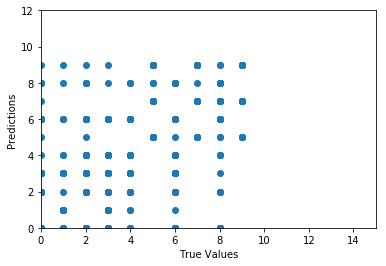

In [30]:
## The line / model
#%pylab inline
plt.scatter(classification_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis([0, 15, 0, 12])
plt.show()

In [48]:
confusion = np.zeros((10,10))

for truth, predict in zip(classification_test.astype(int), results.astype(int)):
    confusion[truth, predict] += 1

In [49]:
print(confusion)

[[ 853.    0.   10.   15.    1.    1.  114.    1.    4.    1.]
 [   4.  982.    1.    6.    2.    0.    3.    0.    1.    1.]
 [  23.    0.  663.    9.  201.    1.   98.    0.    4.    1.]
 [  48.   12.    8.  878.   21.    0.   31.    0.    1.    1.]
 [   3.    2.   36.   24.  866.    0.   66.    0.    3.    0.]
 [   0.    0.    0.    0.    0.  895.    0.   57.    3.   45.]
 [ 152.    1.   38.   17.   94.    1.  688.    0.    9.    0.]
 [   0.    0.    0.    0.    0.    6.    0.  967.    1.   26.]
 [  11.    0.    4.    1.    4.    2.   12.    8.  956.    2.]
 [   0.    0.    0.    0.    0.    5.    0.   44.    0.  951.]]


shirt and T-shirt are the most confused in both dirrections. Coats get classified as pullovers but not visa versa

In [68]:
incorrectClass = confusion[~np.eye(confusion.shape[0],dtype=bool)]
percentileLims = np.percentile(incorrectClass,[2.5,97.5])
print('95% percentiles: ', percentileLims)

outliers = incorrectClass[(percentileLims[0]>incorrectClass)|(percentileLims[1]<incorrectClass)]
print('outlier counts: ',outliers)

outIndex = np.zeros((len(outliers),2))
for idx,outlay in enumerate(outliers):
    outIndex[idx,:] = np.argwhere(confusion==outlay)
    #print(np.argwhere(confusion==outlay))

for pair in range(len(outliers)):
    print(definitions[int(outIndex[pair,0])],' is commonly classified as a ',definitions[int(outIndex[pair,1])])

95% percentiles:  [   0.   110.4]
outlier counts:  [ 114.  201.  152.]
T-shirt/top  is commonly classified as a  Shirt
Pullover  is commonly classified as a  Coat
Shirt  is commonly classified as a  T-shirt/top


In [45]:
comp= np.equal(list(classification_test.ravel()), list(results))
#print(comp.shape)
#print(classification_test.ravel())
#print(results)
print(comp)
print(comp.sum())
print('Percentage: {}'.format(100*(comp.sum()/(len(comp)))))

[ True  True  True ...,  True False False]
8445
Percentage: 84.45


Convolutional Neural Network below

In [ ]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train y_train), (x_test, y_test) = mnist.load_data()
x_train = preclassifier_data
y_train = classification.ravel()
x_test = preclassifier_data_test
y_test = classification_test.ravel()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.7502 - acc: 0.7318 - val_loss: 0.4668 - val_acc: 0.8268
Epoch 2/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.5102 - acc: 0.8180 - val_loss: 0.4004 - val_acc: 0.8562
Epoch 3/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.4542 - acc: 0.8394 - val_loss: 0.3687 - val_acc: 0.8644
Epoch 4/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.4185 - acc: 0.8488 - val_loss: 0.3397 - val_acc: 0.8755
Epoch 5/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.3992 - acc: 0.8581 - val_loss: 0.3288 - val_acc: 0.8785
Epoch 6/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3808 - acc: 0.8651 - val_loss: 0.3108 - val_acc: 0.8873
Epoch 7/12
60000/60000 [=========================

from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_3rd_layer_output([1])[0]

In [ ]:
## The line / model
#%pylab inline
plt.scatter(classification_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis([0, 15, 0, 12])
plt.show()